In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
import utils as ut
import avida as avida
import evals as evals

In [2]:
## create dumbbell dataset
def circle(n, r, sigma):
    theta = np.random.rand(n) * 2 * np.pi
    radius = np.random.randn(n) * sigma + r
    X = np.empty([n,2])
    X[:,0] = np.cos(theta) * radius
    X[:,1] = np.sin(theta) * radius
    return X

n = 200
m = 200
np.random.seed(547)
our_normalize=0

X1 = np.empty([n,2])
X1[:,0] = np.random.rand(n) * 50
X1[:,1] = np.random.randn(n)

X2 = np.zeros([m,2])
X2[:50,:] = circle(50, 3, 0.5)
X2[50:100,:] = circle(50, 3, 0.5) 
X2[50:100,0] += 14
X2[100:200,0] = np.random.rand(100) * 7 + 3
X2[100:200,1] = np.random.randn(100) * 0.2

labels_1 = np.zeros(n)
labels_2 = np.zeros(m)
labels_2[:50] = 1
labels_2[50:100]=2

In [3]:
Y1, Y2 = avida.avida_tsne(X1,X2,alpha=0.3,normalize=our_normalize,visualize=0,labels1=labels_1,labels2=labels_2,partial=True,partial_size=0.75)

dumbbell_FOSCTTM_avida = np.mean(evals.calc_domainAveraged_FOSCTTM(Y1[50:150,:], Y2[100:200,:]))
dumbbell_integration_avida = evals.integration_score(Y1,Y2)
dumbbell_vision_loss_avida = evals.vis_loss(X1,X2,Y1,Y2,our_normalize)
dumbbell_alignment_avida = evals.test_alignment_score(Y1,Y2)
dumbbell_accuracy_ours_avida = evals.our_accuracy(Y1[50:150,:], Y2[100:200,:])

print('AVIDA FOSCTTM score: '+str(dumbbell_FOSCTTM_avida))
print('AVIDA Integration score: '+str(dumbbell_integration_avida))
print('AVIDA t-SNE Loss: '+str(dumbbell_vision_loss_avida))
print('AVIDA Alignment Score: '+str(dumbbell_alignment_avida))
print('AVIDA Our Accuracy: '+str(dumbbell_accuracy_ours_avida))

Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 2.920108
Computing pairwise distances...
Computing P-values for point 0 of 200...
Mean value of sigma: 1.570276
Iteration 100: error is 16.621173
Iteration 200: error is 17.789767
Iteration 300: error is 0.311677
It.  |Err         |Loss        
-------------------------------
    0|2.953301e-03|1.177663e+01
   10|9.921511e-04|9.492345e+00
   20|4.224482e-05|4.190495e+00
   30|9.792339e-06|4.189844e+00
   40|2.273925e-06|4.189845e+00
   50|5.281645e-07|4.189854e+00
   60|1.226852e-07|4.189856e+00
   70|2.849852e-08|4.189857e+00
4.189856699776275
Iteration 400: error is 0.290495
It.  |Err         |Loss        
-------------------------------
    0|3.324580e-03|1.558251e+01
   10|1.090790e-04|3.687873e+00
   20|1.667112e-05|3.685244e+00
   30|3.664808e-06|3.686409e+00
   40|8.076142e-07|3.686696e+00
   50|1.780774e-07|3.686761e+00
   60|3.927083e-08|3.686775e+00
3.6867753843479942
Iteration 500: 

Text(0.5, 1.0, 'AVIDA: Colored by Domain')

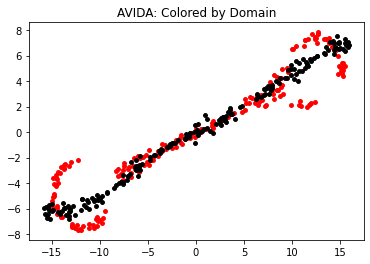

In [5]:
plt.scatter(Y2[:,0],Y2[:,1],c='r',s=15)
plt.scatter(Y1[:,0],Y1[:,1],c='k',s=15)
plt.title("AVIDA: Colored by Domain")